# **Summary**

In this case study I am going to analyze data from FitBit users, which is a personal health tracker. The objective is to gain insights from FitBit secondary data, to drive business decisions for another health tracker company called BellaBeat. This data analysis can help guide BellaBeat`s marketing strategies, particularly for two of their products Leaf (tracker bracelet) and Time (wellness watch). Their main feature is tracking and measuring user wellness activities by connecting to BellaBeat app. Then the app provides users with insights into their daily wellness, using attributes such as sleep, weight, calories burnt, menstrual cycle, and mindfulness habits. I am going to analize FitBit data to find the most important problems BellaBeat might face and come up with recommendations on what tools to implement to solve them. The datasets and some instructions were provided by Google Data Analytics, which is a course on Cursera, developed by Google. The datasets are not perfect and have some limitations. The purpose is not to pass over these limitations, and make it seem like the analysis is perfectly accurate, but rather to face the limitations and discuss some possible ways to avoid them in the future. These limitations commonly occur in many similar datasets in practice. Hence, it may be useful to discuss them thoroughly.



## **Business** **Task**
the business task is, essentially, to provide BellaBeat with recommendations for their digital marketing strategy.

<span style="font-size:1.5em;">**STAKEHOLDERS**

<span style="font-size:1.1em;">

* <b>Urška Sršen</b> – Bellabeat’s cofounder and Chief Creative Officer.
* <b>Sando Mur</b> – Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.
* <b>Bellabeat marketing analytics team</b> – A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## **Questions to address (Ask)**
1. What are some trends in smart device usage?
2. How could these trends apply to BellaBeat customers?
3. How could these trends help influence BellaBeat marketing strategy?








## **Deliverables**

1. A clear summary of problem
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
Your top high-level content recommendations based on your analysis

# Data Preparation

In this step, we need to prepare data for processing and analyzing. We will need to take a close look at the datasets, summarize them and discover some data quality characteristics. To do so, we need to examine each dataset closely. Originally there where 18 available FitBit datasets that were obtained from Kaggle. Of the 18 original datasets only 7 were used, since some columns repeated across the datasets and some of them did not fit into the context of this case study problems.

### Data Summary

I used total 7 datasets which have most of the important information
1. Daily_activity
2. Heart_Rate
3. Hourly_Calories
4. Hourly_intensities
5. Sleep_day
6. Hourly_steps
7. weight

### Data Limitations

1. **Limited Users and Data:** The datasets only have data from 33 different users, which is not very comprehensive. Only 8 users entered information for weight, 12 users for heart rate, and 24 users for sleep. Furthermore, some users didn't provide all the required information, making the data incomplete.

2. **Data Source:** The data comes from FitBit users, not directly from BellaBeat. Since FitBit users' behaviors and data may differ from BellaBeat's target audience, the insights might not perfectly align with BellaBeat's situation.

3. **Data Timeframe:** The data was collected between April 12, 2016, and May 12, 2016, which is quite old compared to the current date (around 7 years old). This could affect the relevance of the insights and recommendations.

4. **Limited Collection Period:** Data was only collected for 30 days from each user. With only 33 users providing data, this limited sample size (990 expected rows but only 940 rows in the dataset) may not accurately represent the entire user population. Some users might not have used their trackers consistently.

5. **Potential Biases:** Some users might have contributed more data than others due to device issues or usage patterns. It's unclear whether users contributed data voluntarily or were guided on when and how to use the app. The dataset might also contain biases due to incomplete or manually entered data, affecting its accuracy.

6. **Real-world Considerations:** In a real project, these limitations would have been addressed before analysis. Questions like why some users generated more data, the control over data collection, measures against sampling bias, obtaining more recent or original data, and acquiring similar data from BellaBeat would need answers.

Despite these limitations, in the context of this case study, the analysis will continue. However, these potential issues should be kept in mind when interpreting the results and recommendations.



# **Data Cleaning and Data Processing**
In the previous section, we prepared the foundation for working with the data. Now, even though we've identified some limitations, we've chosen to move forward with the analysis. Our next step is to clean the data, focusing on maintaining its accuracy and discussing potential risks if the data's integrity is compromised.

It's important to note that in some cases, certain integrity issues might be beyond our control and cannot be fully resolved due to limitations like the inability to communicate with stakeholders. For instance, we found that some  users did not provided weight and heart rate information, which could lead to misleading conclusions. While we'll acknowledge these issues for learning purposes, remember that in a real-world scenario, a data analyst would prioritize ensuring data integrity before proceeding with the analysis.







#### Mounting Google drive on colab

In [1]:
# I have stored my data in google drive, so we need to mount our drive on google colab
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


#### Importing libraries

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from pandas.api.types import CategoricalDtype
import os
%matplotlib inline

import seaborn as sns

#### Loading Datasets

In [3]:
daily_activity = pd.read_csv("/content/drive/MyDrive/archive (1)/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heart_rate = pd.read_csv("/content/drive/MyDrive/archive (1)/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourly_calories = pd.read_csv("/content/drive/MyDrive/archive (1)/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv("/content/drive/MyDrive/archive (1)/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv("/content/drive/MyDrive/archive (1)/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep_day = pd.read_csv("/content/drive/MyDrive/archive (1)/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight = pd.read_csv("/content/drive/MyDrive/archive (1)/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
#minute_MET =pd.read_csv("/content/drive/MyDrive/archive (1)/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")

## **Data Exploration**

#### Taking over view of datasets
Lets take a overvoew of datasets

In [12]:
daily_activity.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [13]:
heart_rate.head()

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [14]:
hourly_calories.head()

,Id,Time,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [16]:
hourly_intensities.head()

,Id,Time,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


In [17]:
hourly_steps.head()

,Id,Time,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [18]:
sleep_day.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [19]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


#### Here we are going to check the datatypes of our datasets
It is very important to know the datasets types it help use to analyze the datasets

In [14]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [15]:
heart_rate.dtypes

Id        int64
Time     object
Value     int64
dtype: object

In [16]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [17]:
hourly_intensities.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

In [18]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [19]:
sleep_day.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [20]:
weight.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

### Here are going to understand the number of rows and colunms

In [21]:
daily_activity.shape

(940, 15)

In [22]:
heart_rate.shape

(2483658, 3)

In [23]:
hourly_calories.shape

(22099, 3)

In [24]:
hourly_intensities.shape

(22099, 4)

In [25]:
hourly_steps.shape

(22099, 3)

In [26]:
sleep_day.shape

(413, 5)

In [27]:
weight.shape

(67, 8)

### Now we are going to check the how many unique user data we have in every datasets

In [28]:
daily_activity.Id.nunique()

33

In [29]:
heart_rate.Id.nunique()

14

In [31]:
hourly_calories.Id.nunique()

33

In [32]:
hourly_steps.Id.nunique()

33

In [33]:
sleep_day.Id.nunique()

24

In [34]:
weight.Id.nunique()

8

### Here we are going to look statics of datasets

In [35]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [36]:
heart_rate.describe()

,Id,Value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


In [38]:
hourly_calories.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


In [39]:
hourly_intensities.describe()

,Id,TotalIntensity,AverageIntensity
count,2.209900e+04,22099.000000,22099.000000
mean,4.848235e+09,12.035341,0.200589
std,2.422500e+09,21.133110,0.352219
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000
50%,4.445115e+09,3.000000,0.050000
75%,6.962181e+09,16.000000,0.266667
max,8.877689e+09,180.000000,3.000000


In [40]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [41]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [42]:
weight.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


## **Data Cleaning**

### Checking the Null values in our datasets

In [43]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [44]:
heart_rate.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

In [45]:
hourly_calories.isnull().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

In [46]:
hourly_intensities.isnull().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [47]:
hourly_steps.isnull().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [48]:
sleep_day.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [49]:
weight.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

### Checking duplicates in our datasets

In [51]:
daily_activity.duplicated().sum()

0

In [52]:
heart_rate.duplicated().sum()

0

In [53]:
hourly_intensities.duplicated().sum()

0

In [54]:
hourly_steps.duplicated().sum()

0

##### Here we can see that in sleep_day dataset have 3 duplicates. Now we remove this all duplicates

In [4]:
sleep_day.duplicated().sum()

3

In [5]:
sleep_day.drop_duplicates(inplace=True)

In [58]:
sleep_day.duplicated().sum()

0

In [56]:
weight.duplicated().sum()

0

## **Data Processing**

### changing Data format

In [6]:
# here we are changing the date data from ojbect to datetime format
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

heart_rate["Time"] = pd.to_datetime(heart_rate['Time'])

sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])

hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])

hourly_intensities["ActivityHour"] = pd.to_datetime(hourly_intensities["ActivityHour"])

weight['Date'] = pd.to_datetime(weight["Date"])

### Now we are going to rename our dataset columns so we can merge then together for analyzing data

In [8]:
# renaming the date columns
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})

sleep_day = sleep_day.rename(columns={'SleepDay': 'Date'})

hourly_intensities = hourly_intensities.rename(columns = {'ActivityHour' : 'Time'})

hourly_steps = hourly_steps.rename(columns={'ActivityHour' : 'Time'})

hourly_calories = hourly_calories.rename(columns={'ActivityHour' : 'Time'})


### Before going to add all Datasets we will group the heart_rate from per second to per hour

In [9]:
# Resample the 'heart_rate' DataFrame to hourly frequency and calculate the mean for each hour
heart_rate_hour = heart_rate.resample('H', on='Time').mean()

# Reset the index of the DataFrame after resampling
heart_rate_hour.reset_index(inplace=True)

# Convert the 'Id' column to integer data type
heart_rate_hour['Id'] = heart_rate_hour['Id'].astype(int)

# Extract the day name from the 'Time' column and assign it to a new 'WeekDay' column
heart_rate_hour["WeekDay"] = heart_rate_hour["Time"].dt.day_name()

In [20]:
heart_rate_hour.head()

,Time,Id,Value,WeekDay
0,2016-04-12 00:00:00,4883813662,63.576524,Tuesday
1,2016-04-12 01:00:00,4730090630,62.193262,Tuesday
2,2016-04-12 02:00:00,5177139564,60.573456,Tuesday
3,2016-04-12 03:00:00,5185978617,60.274611,Tuesday
4,2016-04-12 04:00:00,5223292413,59.480981,Tuesday


##### we can see that heart rate dataset id columns values is diferent from other id columns values.
##### for that resone we can not merge with any datasets.
##### we will do analysis on heart_rate data without mergeing any datasets


### Datasets marging

#### Now I will merge daily activity and sleep day to analyzing the dataset

In [10]:
# Merge the DataFrames 'daily_activity' and 'sleep_day' based on 'Date' and 'Id'
merge_df1 = pd.merge(daily_activity, sleep_day, on=['Date', 'Id'])

# Extract the day name from the 'Date' column and assign it to a new 'WeekDay' column
merge_df1["WeekDay"] = merge_df1["Date"].dt.day_name()

merge_df1.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,Wednesday
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,Friday
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,Saturday
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,Sunday


#### now we going to merge merge_df1 to weight datasets

In [ ]:
# seperating the date and time from weight columns
weight['Date'] = weight['Date'].dt.date

weight['Date'] = pd.to_datetime(weight["Date"])

# Merge the DataFrames 'merge_df1' and 'weight' based on 'Date' and 'Id'
merge_df2 = pd.merge(merge_df1, weight, on=['Date', 'Id'])

merge_df2.head()


#### we going to create a new column Weekday in merge_df2.

In [12]:
# Extract the day name from the 'Date' column and assign it to a new 'WeekDay' column
merge_df2["WeekDay"] = merge_df2["Date"].dt.day_name()

In [15]:
merge_df2.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,WeekDay
0,1503960366,2016-05-02,14727,9.71,9.71,0.0,3.21,0.57,5.92,0.0,...,1,277,309,52.599998,115.963147,22.0,22.650000,True,1462233599000,Monday
1,1503960366,2016-05-03,15103,9.66,9.66,0.0,3.73,1.05,4.88,0.0,...,1,273,296,52.599998,115.963147,NaN,22.650000,True,1462319999000,Tuesday
2,1927972279,2016-04-13,356,0.25,0.25,0.0,0.00,0.00,0.25,0.0,...,1,398,422,133.500000,294.317120,NaN,47.540001,False,1460509732000,Wednesday
3,4558609924,2016-05-01,3428,2.27,2.27,0.0,0.00,0.00,2.27,0.0,...,1,115,129,69.900002,154.103125,NaN,27.320000,True,1462147199000,Sunday
4,5577150313,2016-04-17,12231,9.14,9.14,0.0,5.98,0.83,2.32,0.0,...,1,549,583,90.699997,199.959265,NaN,28.000000,False,1460884675000,Sunday


### here we are going to merge the hourly datasets

In [13]:
# Merge the DataFrames 'hourly_calories' and 'hourly_intensities' based on 'Time' and 'Id'
hourly_marge_1 = pd.merge(hourly_calories, hourly_intensities, on=['Time', 'Id'])

# Merge the DataFrame 'hourly_marge_1' and 'hourly_steps' based on 'Time' and 'Id'
final_hourly_merge = pd.merge(hourly_marge_1, hourly_steps, on=['Time', 'Id'])

# Extract the day name from the 'Time' column and assign it to a new 'WeekDay' column
final_hourly_merge["WeekDay"] = final_hourly_merge["Time"].dt.day_name()

In [16]:
final_hourly_merge.head() # printing tp 5 rows

,Id,Time,Calories,TotalIntensity,AverageIntensity,StepTotal,WeekDay
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373,Tuesday
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,Tuesday
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151,Tuesday
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0,Tuesday
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0,Tuesday


### Now we have 3 datasets for Analysis and visualization


## **Analysis**

#### **We going to analyze the merge_df2 datasets**

In [20]:
merge_df2.head() # print top 5 rows

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,WeekDay
0,1503960366,2016-05-02,14727,9.71,9.71,0.0,3.21,0.57,5.92,0.0,...,1,277,309,52.599998,115.963147,22.0,22.650000,True,1462233599000,Monday
1,1503960366,2016-05-03,15103,9.66,9.66,0.0,3.73,1.05,4.88,0.0,...,1,273,296,52.599998,115.963147,NaN,22.650000,True,1462319999000,Tuesday
2,1927972279,2016-04-13,356,0.25,0.25,0.0,0.00,0.00,0.25,0.0,...,1,398,422,133.500000,294.317120,NaN,47.540001,False,1460509732000,Wednesday
3,4558609924,2016-05-01,3428,2.27,2.27,0.0,0.00,0.00,2.27,0.0,...,1,115,129,69.900002,154.103125,NaN,27.320000,True,1462147199000,Sunday
4,5577150313,2016-04-17,12231,9.14,9.14,0.0,5.98,0.83,2.32,0.0,...,1,549,583,90.699997,199.959265,NaN,28.000000,False,1460884675000,Sunday


In [32]:
merge_df2.describe() # statics of data

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,...,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,LogId
count,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,1.0,35.000000,3.500000e+01
mean,6.398202e+09,9687.171429,6.522571,6.463714,0.286705,1.727143,0.908286,3.879714,0.006000,27.485714,...,688.514286,2052.00000,1.085714,430.257143,449.800000,64.168572,141.467485,22.0,24.828571,1.461778e+12
std,1.548154e+09,4383.711827,2.986965,2.939219,0.963686,1.694489,0.803904,1.478794,0.024758,36.356383,...,155.462190,519.54539,0.373491,92.287703,95.032131,13.307268,29.337505,NaN,4.063695,7.965107e+08
min,1.503960e+09,356.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,127.000000,928.00000,1.000000,115.000000,129.000000,52.599998,115.963147,22.0,22.650000,1.460506e+12
25%,6.962181e+09,5780.000000,3.825000,3.825000,0.000000,0.000000,0.190000,2.760000,0.000000,0.000000,...,635.500000,1852.50000,1.000000,399.000000,420.000000,61.200001,134.922906,22.0,23.889999,1.461067e+12
50%,6.962181e+09,10524.000000,6.960000,6.960000,0.000000,1.200000,0.760000,3.910000,0.000000,18.000000,...,689.000000,2039.00000,1.000000,442.000000,455.000000,61.500000,135.584291,22.0,24.000000,1.461888e+12
75%,6.962181e+09,12484.500000,8.730000,8.610000,0.000000,3.305000,1.680000,4.880000,0.000000,42.000000,...,736.000000,2167.50000,1.000000,472.500000,494.000000,61.900002,136.466144,22.0,24.170000,1.462363e+12
max,6.962181e+09,20031.000000,13.240000,13.240000,4.081692,5.980000,2.390000,7.040000,0.110000,200.000000,...,1121.000000,4552.00000,3.000000,630.000000,679.000000,133.500000,294.317120,22.0,47.540001,1.463098e+12


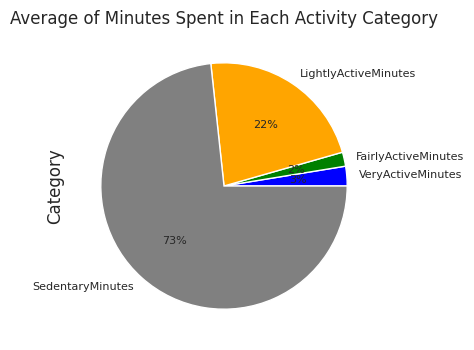

In [31]:
# Select columns for the different activity categories and calculate their mean
Activity = merge_df1[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

# Define custom colors for each activity category
custom_colors = ['blue', 'green', 'orange', 'gray']

# Create a pie chart using the mean values of each activity category
Activity.plot.pie(ylabel='Category', title='Average of Minutes Spent in Each Activity Category', autopct='%1.0f%%', fontsize='8', startangle=0, figsize=(8,4),colors=custom_colors)
plt.show()

When we analyze the above graph and merge_df2 then we find that active minute is more recommended 30 minute daily moderate physical activity. It is also said that reducing sitting time is important to avoid one's risk of developing metabolic problems. We can conclude from our data that, even though our users are being very active for over 30 minutes every day, they are still spending an enormous amount of time being sedentary, which could result in future health issues.

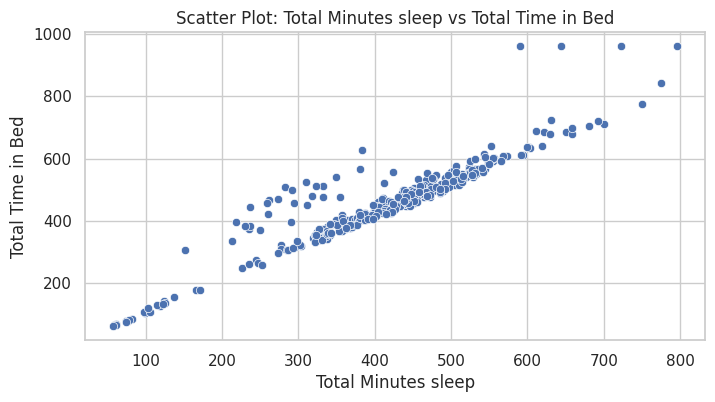

In [24]:
# Set the style
sns.set(style="whitegrid")

# Scatter plot: TotalSteps vs Calories
plt.figure(figsize=(8, 4))
sns.scatterplot(x='TotalMinutesAsleep', y='TotalTimeInBed', data = merge_df1)

# Add title and labels to the plot
plt.xlabel('Total Minutes sleep')
plt.ylabel('Total Time in Bed')
plt.title('Scatter Plot: Total Minutes sleep vs Total Time in Bed')
plt.show()

The scatter plot shows a strong positive linear association between the total number of minutes asleep and the total time spent in bed, which means that most users are usually in bed only when they are sleeping, and not much longer before or after that. However, we can still see that, at times, they do spend a larger amount of time in bed without being asleep. Bellabeat can send the alert to those user.

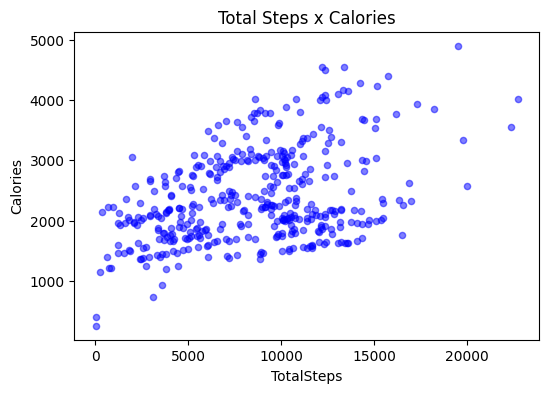

In [31]:
# Create a scatter plot with TotalSteps on the x-axis and Calories on the y-axis
merge_df1.plot.scatter(x='TotalSteps', y='Calories', color='blue', alpha=0.5, figsize=(6,4))

# Add a title to the plot
plt.title('Total Steps x Calories')
plt.show()

In the above graph we can see that calories and steps ghaph is almost lenear and consistent.

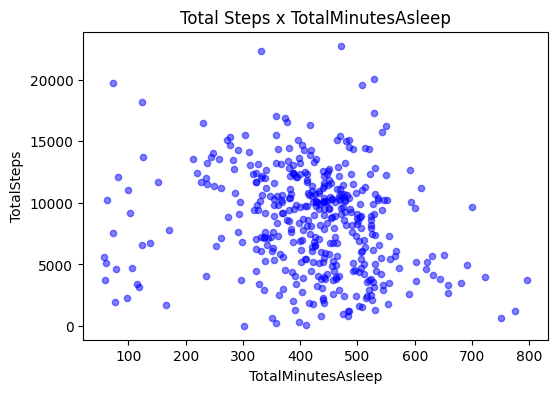

In [26]:
# Create a scatter plot with TotalMinutesAsleep on the x-axis and TotalSteps on the y-axis
merge_df1.plot.scatter(x='TotalMinutesAsleep', y='TotalSteps', color='blue', alpha=0.5, figsize=(6,4))

# Add a title to the plot
plt.title('Total Steps x TotalMinutesAsleep')
plt.show()

In the above graph we can see that most of the users taking proper sleep and steps in day. some user are taking more sleep and step. Bellabeat can send them alert and recomendation for that.

<ipython-input-31-fffbc2970ba5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday = merge_df1.copy().groupby(merge_df1['WeekDay']).mean().reindex(cats)


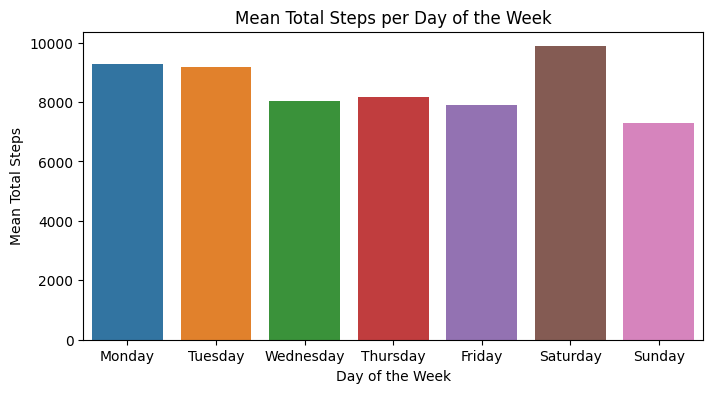

In [31]:
# Define the order of weekdays (Monday to Sunday)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical data type with the specified order
cat_type = CategoricalDtype(categories=cats, ordered=True)

# Convert the 'WeekDay' column to the defined categorical data type
merge_df1['WeekDay'] = merge_df1['WeekDay'].astype(cat_type)

# Create a copy of the DataFrame and group it by 'WeekDay', then calculate the mean for each day
df_weekday = merge_df1.copy().groupby(merge_df1['WeekDay']).mean().reindex(cats)

# Filter the resulting DataFrame to keep only the 'TotalMinutesAsleep' column
df_filtered = df_weekday.filter(['TotalSteps'])

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=df_filtered.index, y='TotalSteps', data=df_filtered)

# Add title and labels to the plot
plt.title("Mean Total Steps per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Total Steps")
plt.show()



In above graph we can see that almost all users taking total steps is less than 10000 thoughtout the day. according to the study a  healthy person averge total spets per day. It also depends on age, gender, activity lavel, lifestyle and we dont have these parameter to analyze. we can see that at saturday people take highest steps and at sunday lowest which is understandable.

<ipython-input-32-f26c35986c52>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday = merge_df1.copy().groupby(merge_df1['WeekDay']).mean().reindex(cats)


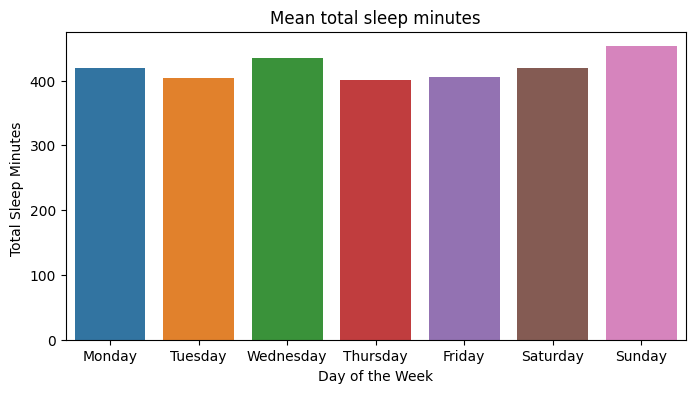

In [32]:
# Define the order of weekdays (Monday to Sunday)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical data type with the specified order
cat_type = CategoricalDtype(categories=cats, ordered=True)

# Convert the 'WeekDay' column to the defined categorical data type
merge_df1['WeekDay'] = merge_df1['WeekDay'].astype(cat_type)

# Create a copy of the DataFrame and group it by 'WeekDay', then calculate the mean for each day
df_weekday = merge_df1.copy().groupby(merge_df1['WeekDay']).mean().reindex(cats)

# Filter the resulting DataFrame to keep only the 'TotalMinutesAsleep' column
df_filtered = df_weekday.filter(['TotalMinutesAsleep'])

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=df_filtered.index, y='TotalMinutesAsleep', data=df_filtered)

# Add title and labels to the plot
plt.title("Mean total sleep minutes")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sleep Minutes ")
plt.show()

In the column chart above, we can see that the average Total Minutes Asleep goes above the 400-minute mark - **419.8 minutes** to be exact - with **Sunday (7.6 hours)** and **Wednesday (7.2 hours)** being the days where the users seem to have slept the most. It is clear from this visualization that there are no significant changes in sleeping time throughout the week. This information shows us that the users have a consistent sleeping schedule.

By analyzing the chart above, we can see that Sunday records the highest number of the Total Minutes Asleep average. If we go back to the **"Average of Total Steps by Day of the Week"** graph, we learn that Sunday also recorded the lowest number of the total steps average in the week, showing us that Sunday is likely the users' choice of a rest day.

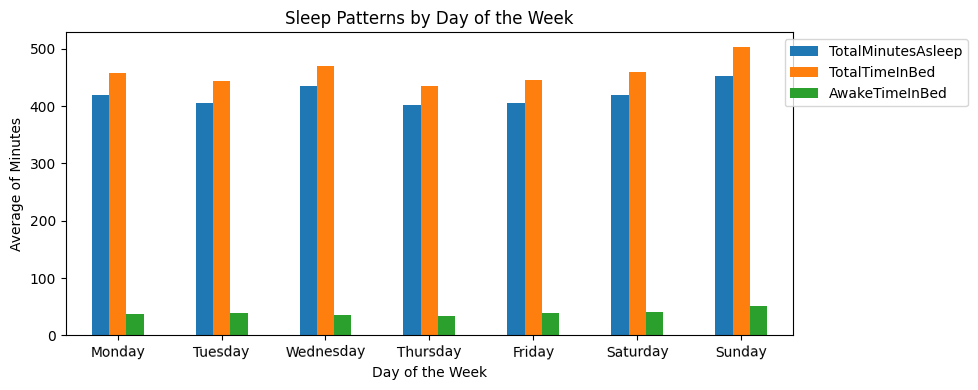

In [37]:
# Filter the 'TotalMinutesAsleep' and 'TotalTimeInBed' columns from df_weekday
df_weekday.filter(['TotalMinutesAsleep', 'TotalTimeInBed'])

# Select the 'TotalMinutesAsleep' and 'TotalTimeInBed' columns using double square brackets
df_weekday[['TotalMinutesAsleep', 'TotalTimeInBed']]

# Calculate the 'AwakeTimeInBed' column as the difference between 'TotalTimeInBed' and 'TotalMinutesAsleep'
df_weekday['AwakeTimeInBed'] = df_weekday['TotalTimeInBed'] - df_weekday['TotalMinutesAsleep']

# Create a DataFrame containing 'TotalMinutesAsleep', 'TotalTimeInBed', and 'AwakeTimeInBed'
time_bed = df_weekday[['TotalMinutesAsleep', 'TotalTimeInBed', 'AwakeTimeInBed']]

# Create a bar plot using Seaborn
ax = time_bed.plot.bar(xlabel='Day of the Week', ylabel='Average of Minutes', rot=1, figsize=(10, 4))
plt.title('Sleep Patterns by Day of the Week')

# Add a legend to the plot, positioned outside the plot area
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


As we can see, the users are very consistent with their time in bed throughout the days of the week, and the same goes for the time they are awake in bed. From their total time in bed, they spend, on average, 39.5 minutes awake. The longest recorded times occurred on the weekend, which is perfectly understandable.

#### **we are going to analyze final_hourly_merge dataset**

In [39]:
final_hourly_merge.head()

,Id,Time,Calories,TotalIntensity,AverageIntensity,StepTotal,WeekDay
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373,Tuesday
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,Tuesday
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151,Tuesday
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0,Tuesday
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0,Tuesday


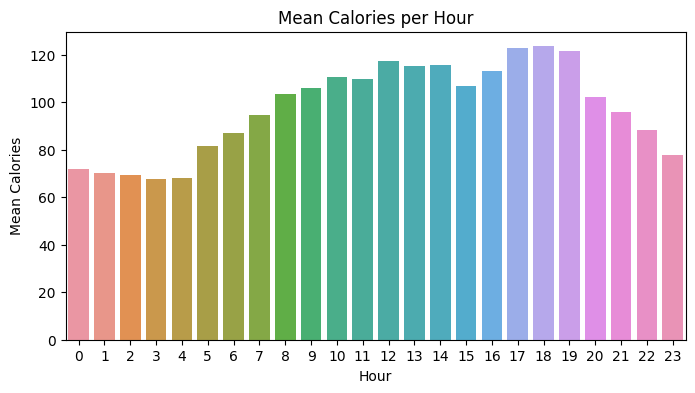

In [35]:
# Convert 'Time' column to datetime
final_hourly_merge['Time'] = pd.to_datetime(final_hourly_merge['Time'])

# Calculate the mean calories per hour
mean_calories_per_hour = final_hourly_merge.groupby(final_hourly_merge['Time'].dt.hour)['Calories'].mean()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=mean_calories_per_hour.index, y=mean_calories_per_hour.values)

# Add title and labels to the plot
plt.xlabel('Hour')
plt.ylabel('Mean Calories')
plt.title('Mean Calories per Hour')
plt.show()

In the above graph we can see that when people at deep sleep they bourn least amounts of calories. at 5 AM people start bourning more amounts of calories. as all graph showing that at 5 PM TO 7 PM people are more active so they are bourning more calories at these time.

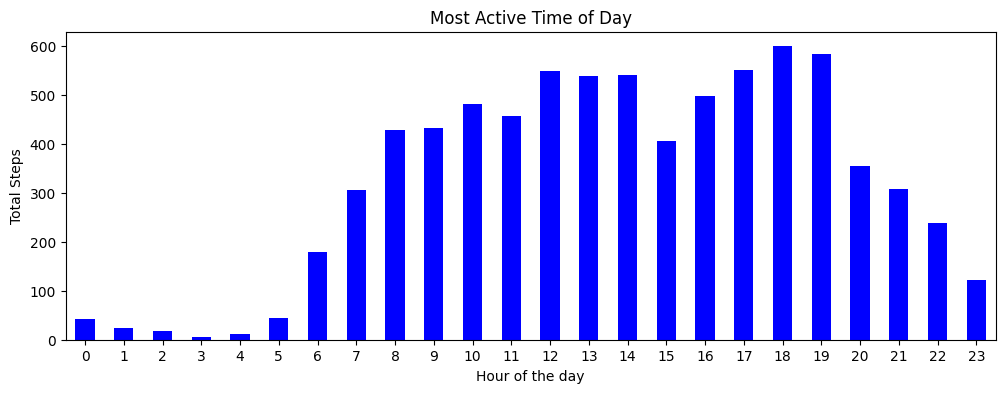

In [21]:
# Create a figure and a set of subplots (axes)
fig, axs = plt.subplots(figsize=(12, 4))

# Group the data by hour of the day and calculate the mean of 'StepTotal' for each hour
final_hourly_merge.groupby(final_hourly_merge['Time'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='blue', title='Most Active Time of Day')

# Add labels to the x and y axes
plt.xlabel("Hour of the day")
plt.ylabel("Total Steps")
plt.show()

In the above graph we can see that users are start their day a 6 AM. throuthout the day they increase the activity. at the lunch time users activity decreases and at 5 AM TO 7 AM they do more activity like exersize.

### **Here we are going to analyze the heart_rate dataset**

In [21]:
heart_rate_hour.head()

,Time,Id,Value,WeekDay
0,2016-04-12 00:00:00,4883813662,63.576524,Tuesday
1,2016-04-12 01:00:00,4730090630,62.193262,Tuesday
2,2016-04-12 02:00:00,5177139564,60.573456,Tuesday
3,2016-04-12 03:00:00,5185978617,60.274611,Tuesday
4,2016-04-12 04:00:00,5223292413,59.480981,Tuesday


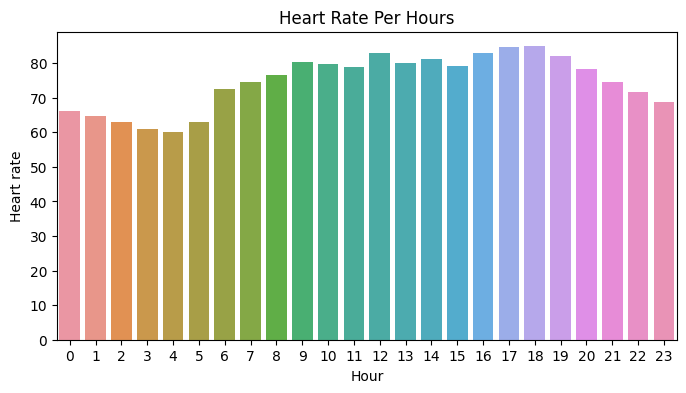

In [20]:
# Calculate the mean heart rate for each hour of the day
heart_rate_per_hour= heart_rate_hour.groupby(heart_rate_hour['Time'].dt.hour)['Value'].mean()

# Create a figure with a specific size
plt.figure(figsize=(8, 4))

# Group the heart rate data by hour and calculate the mean heart rate
heart_rate_per_hour = heart_rate_hour.groupby(heart_rate_hour['Time'].dt.hour)['Value'].mean()

# Create a bar plot using Seaborn
sns.barplot(x=heart_rate_per_hour.index, y= heart_rate_per_hour.values)

# Add labels to the x and y axes
plt.xlabel('Hour')
plt.ylabel('Heart rate')

# Set the title of the plot
plt.title('Heart Rate Per Hours')
plt.show()

<ipython-input-23-76be34f75a4b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday = heart_rate_hour.copy().groupby(heart_rate_hour['WeekDay']).mean().reindex(cats)


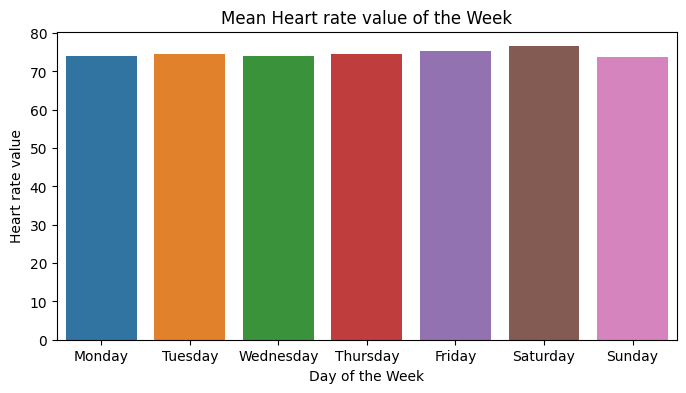

In [23]:
# Define the order of weekdays (Monday to Sunday)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical data type with the specified order
cat_type = CategoricalDtype(categories=cats, ordered=True)

# Convert the 'WeekDay' column to the defined categorical data type
heart_rate_hour['WeekDay'] = heart_rate_hour['WeekDay'].astype(cat_type)

# Create a copy of the DataFrame and group it by 'WeekDay', then calculate the mean for each day
df_weekday = heart_rate_hour.copy().groupby(heart_rate_hour['WeekDay']).mean().reindex(cats)

# Filter the resulting DataFrame to keep only the 'Value' column
df_filtered = df_weekday.filter(['Value'])

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 4))

# Add title and labels to the plot
sns.barplot(x=df_filtered.index, y='Value', data=df_filtered)

# Show the plot
plt.title("Mean Heart rate value of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Heart rate value")
plt.show()

After analyzing the heart rate dataset, I found that its id is different to the other datasets, for that reason its not possible to merge it to other dataset, so i did analyze without merging any datasets.
when I analyze the heart rate per hours digram I found that at 5 PM To 7 PM user heart rate is highest. It is not suprising me because users most active time is 5 PM TO 7 PM. It also show that most user are prefering to do exersize at evening not at morning.
When I analyze the heart rate per week digrame then it showing that at sunday users are more ralaxing and through out the week day almost same.

# ACT

1. The average user takes 7,638 steps and burns 2,304 calories per day.
2. There is a positive relationship between the total number of steps and the total number of burned calories.
3. The users seem to be consistent with their total steps scores throughout the week. The most active day is Saturday, and the least active is Sunday.
4. The users start their day between 6 am and 8 am. They are most active between 5 pm and 7 pm, and become less active at 8 pm.
5. The highest number of burned calories occur between 5 pm and 7 pm, when the users are most active.
Although the average user is very active for over 30 minutes every day, they still spend 81% of their time being sedentary.
6. There is a strong, positive relationship between the total number of minutes asleep and the total time spent in bed, with users only spending an average of 39.5 minutes of their total time in bed being awake.
7. The users have a consistent sleeping schedule, with an average sleeping time of 419.8 minutes (or 7 hours) per night - with Sunday (7.6 hours) being the day where the users seem to have slept the most.
8. Recording the lowest number of steps and the highest number of minutes asleep, Sunday is likely a rest day chosen by the users.
9. the highest heartbit rate found at 5 PM to 7 PM.

# Recommendations

1. **Data Engineering:** We saw that the data issues that violated the its integrity resulted in lots of problems throughout this case study. I will recommend bellabeat to build a data engineering team they will collect the proper data to build a robust recommendation system.
2. **Personalized Notifications to Promote Activity:** Crate a data analysis and Data science team to bulid a Deep Neural Network model to collect the data in real time and send personalized notification to the user about their activity.
3. **Detailed Activity Counter:** The app could also provide an elegantly design, easy to use interface to track their activity like calories burned, heartbit rate, total step.

4. **Detailed Sleeping Log:**  The average user has a consistent sleeping schedule, but those who may want to improve the quality of their sleep - or simply keep track of it - could benefit from a sleeping log. The app could offer this feature and record sleep quality, the number of times one wakes up during the night, the total amount of awake time in bed, anxiety, and/or stress levels.

5. **Detailed weight log:** Bellabeat app should use a smart sensors to collect the accurate weight of users. because weight is a very important factor in health issus.

6. **Weekly and Monthly Achievement Reports:** To keep the users motivated, the Bellabeat app could provide customized weekly and monthly reports regarding the total number of steps, burned calories, sleeping habits, weight loss, and total time spent on the different activity levels. The app could send congratulatory messages to those who keep up with good habits, as well as motivational tips for improvement depending on the user's overall performance.

7. **Discounts on Other Bellabeat Wellness Products and Services:** Another way to keep customers motivated is to offer special discounts on the different Bellabeat products, as well as their premium membership.Encourage users to spend more time engaging with the app. This way, the users could become more inclined to get more active and purchase more products from the company.

